#### Preparativos

In [2]:
# Instalaciones
!pip install lightgbm

In [4]:
# Importaciones

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import lightgbm as lgb
from lightgbm import LGBMClassifier

In [5]:
# Deslimitar/Limitar display Pandas

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', None)

#### Preparación Dataset

In [6]:
# Read Matches data

df0 = pd.read_csv(r'D:\DEV\Python\00_TFM_PALLADIUM\02_DATASETS_GENERADOS\Reservas_Feature_Engineered_v1.csv', sep = ';', decimal=',')

C:\Users\Diego\AppData\Local\Temp\ipykernel_6592\2151874057.py:3: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv(r'D:\DEV\Python\00_TFM_PALLADIUM\02_DATASETS_GENERADOS\Reservas_Feature_Engineered_v1.csv', sep = ';', decimal=',')


In [7]:
df0.head()

,ID_RESERVA,ID_HOTEL,HOTEL,LLEGADA,LLEGADA_ANO,LLEGADA_MES,LLEGADA_DIAm,LLEGADA_DIAs,LLEGADA_AVANCE,SALIDA,SALIDA_ANO,SALIDA_MES,SALIDA_DIAm,SALIDA_DIAs,SALIDA_AVANCE,NOCHES,DURACION_ESTANCIA,REGIMEN,ID_TIPO,TIPO,USO,PAX_NUM,PAX_CAT,ADULTOS,NENES,BEBES,ID_CLIENTE,TIPO_CLIENTE,CLIENTE,GRUPO,ID_MONEDA,MONEDA,STATUS,MOTIVO,CHECKIN,SUPLETORIA,CUNAS,FECHA_TOMA,FECHA_TOMA_ANO,FECHA_TOMA_MES,FECHA_TOMA_DIAm,FECHA_TOMA_DIAs,FECHA_TOMA_AVANCE,FECHA_MOD,FECHA_MOD_ANO,FECHA_MOD_MES,FECHA_MOD_DIAm,FECHA_MOD_DIAs,FECHA_MOD_AVANCE,FECHA_CANCELACION,FECHA_CANCELACION_ANO,FECHA_CANCELACION_MES,FECHA_CANCELACION_DIAm,FECHA_CANCELACION_DIAs,FECHA_CANCELACION_AVANCE,LT_TOMA_LLEGADA,LT_TOMA_CANCELACION,ID_FIDELIDAD,FIDELIDAD,VALHAB,VALPEN,VALSERV,VALFIJOS,COMERCIALIZADORA,CMVALHAB,CMVALPEN,CMCVALSERV,VALOR_USD,VALOR_USD_PAX,VALOR_USD_NOCHE,VALOR_USD_PAX_NOCHE,AUTORIZO,GRATIS,PAIS,CONTINENTE,SEGMENTO,FUENTE_NEGOCIO,CANCELADA
0,456094009201,92,GrandPalladiumJamaica&LadyHamiltonResort,2022-12-28,2022,12,28,3,0.989041095890411,2023-01-04,2023,1,4,3,0.00821917808219178,7,Media,AllInclusive,23300,LHAmbassadorSuiteBSOV,2,3,Familias,2,1,0,19686200,1,PALLADIUMTRAVELCLUB_SOCIOS,0,700,USD,1,DESCONOCIDO_0,1,0,0,2022-01-13,2022,1,13,4,0.03287671232876712,2022-12-28,2022,12.0,28.0,3.0,0.989041095890411,NaN,NaT,NaN,NaN,NaN,NaN,349,NaN,0,Ninguna,1868.0,708.0,0.0,0.0,0,1868.0,708.0,0.0,2576.0,858.6666666666666,368.0,122.66666666666666,1,0,ESTADOSUNIDOS,AMERICA,Fixedrates,DIRECTSALES,0
1,425835909201,92,GrandPalladiumJamaica&LadyHamiltonResort,2022-01-22,2022,1,22,6,0.057534246575342465,2022-01-29,2022,1,29,6,0.07671232876712329,7,Media,AllInclusive,43800,LHJuniorSuiteGV,2,3,Familias,2,1,0,19686200,1,PALLADIUMTRAVELCLUB_SOCIOS,0,700,USD,3,DESCONOCIDO_0,0,0,0,2021-07-13,2021,7,13,2,0.5287671232876713,2022-01-20,2022,1.0,20.0,4.0,0.052054794520547946,2022-01-20,2022,1.0,20.0,4.0,0.052054794520547946,193,191.0,0,Ninguna,1329.3,665.0,0.0,0.0,0,1329.3,665.0,0.0,1994.3,664.7666666666667,284.9,94.96666666666667,1,0,ESTADOSUNIDOS,AMERICA,Fixedrates,DIRECTSALES,1
2,549929510601,106,ComplejoRivieraMaya,2023-11-06,2023,11,6,1,0.8465753424657534,2023-11-14,2023,11,14,2,0.8684931506849315,8,Media,AllInclusive,42000,TRSJuniorSuitePS,2,2,Parejas,2,0,0,19686200,1,PALLADIUMTRAVELCLUB_SOCIOS,0,700,USD,3,DESCONOCIDO_0,0,0,0,2023-04-17,2023,4,17,1,0.29041095890410956,2023-11-07,2023,11.0,7.0,2.0,0.8493150684931506,2023-10-17,2023,10.0,17.0,2.0,0.7917808219178082,203,183.0,0,Ninguna,1146.56,1146.56,0.0,12.48,0,1146.56,1146.56,0.0,2305.6,1152.8,288.2,144.1,1,0,CANADA,AMERICA,Fixedrates,DIRECTSALES,1
3,519229110601,106,ComplejoRivieraMaya,2023-11-06,2023,11,6,1,0.8465753424657534,2023-11-23,2023,11,23,4,0.8931506849315068,17,Larga,AllInclusive,42000,TRSJuniorSuitePS,2,2,Parejas,2,0,0,19686200,1,PALLADIUMTRAVELCLUB_SOCIOS,0,700,USD,3,DESCONOCIDO_0,0,0,0,2023-02-22,2023,2,22,3,0.14246575342465753,2023-11-07,2023,11.0,7.0,2.0,0.8493150684931506,2023-09-14,2023,9.0,14.0,4.0,0.7013698630136986,257,204.0,0,Ninguna,2436.44,2436.44,0.0,26.52,0,2436.44,2436.44,0.0,4899.400000000001,2449.7000000000003,288.20000000000005,144.10000000000002,1,0,ESTADOSUNIDOS,AMERICA,Fixedrates,DIRECTSALES,1
4,537405910601,106,ComplejoRivieraMaya,2023-11-25,2023,11,25,6,0.8986301369863013,2023-12-09,2023,12,9,6,0.936986301369863,14,Larga,AllInclusive,13000,COLJuniorSuiteGV,1,1,Single,1,0,0,19686200,1,PALLADIUMTRAVELCLUB_SOCIOS,0,700,USD,3,DESCONOCIDO_0,0,0,0,2023-02-17,2023,2,17,5,0.12876712328767123,2023-11-26,2023,11.0,26.0,7.0,0.9013698630136986,2023-04-11,2023,4.0,11.0,2.0,0.273972602739726,281,53.0,0,Ninguna,2413.18,0.0,0.0,21.84,0,2413.18,0.0,0.0,2435.02,2435.02,173.93,173.93,1,0,RUMANIA,EURESTE,Fixedrates,DIRECTSALES,1


In [8]:
df0.columns

Index(['ID_RESERVA', 'ID_HOTEL', 'HOTEL', 'LLEGADA', 'LLEGADA_ANO',
       'LLEGADA_MES', 'LLEGADA_DIAm', 'LLEGADA_DIAs', 'LLEGADA_AVANCE',
       'SALIDA', 'SALIDA_ANO', 'SALIDA_MES', 'SALIDA_DIAm', 'SALIDA_DIAs',
       'SALIDA_AVANCE', 'NOCHES', 'DURACION_ESTANCIA', 'REGIMEN', 'ID_TIPO',
       'TIPO', 'USO', 'PAX_NUM', 'PAX_CAT', 'ADULTOS', 'NENES', 'BEBES',
       'ID_CLIENTE', 'TIPO_CLIENTE', 'CLIENTE', 'GRUPO', 'ID_MONEDA', 'MONEDA',
       'STATUS', 'MOTIVO', 'CHECKIN', 'SUPLETORIA', 'CUNAS', 'FECHA_TOMA',
       'FECHA_TOMA_ANO', 'FECHA_TOMA_MES', 'FECHA_TOMA_DIAm',
       'FECHA_TOMA_DIAs', 'FECHA_TOMA_AVANCE', 'FECHA_MOD', 'FECHA_MOD_ANO',
       'FECHA_MOD_MES', 'FECHA_MOD_DIAm', 'FECHA_MOD_DIAs', 'FECHA_MOD_AVANCE',
       'FECHA_CANCELACION', 'FECHA_CANCELACION_ANO', 'FECHA_CANCELACION_MES',
       'FECHA_CANCELACION_DIAm', 'FECHA_CANCELACION_DIAs',
       'FECHA_CANCELACION_AVANCE', 'LT_TOMA_LLEGADA', 'LT_TOMA_CANCELACION',
       'ID_FIDELIDAD', 'FIDELIDAD', 'VALHAB', '

In [9]:
# Cuando nos pongamos con modelos que acepten valores categóricos, convendrá pasar algunos int a category
# Ahora lo mantendremos así para poder trabajar con modelos simples

#### Preparación de un DF Mixto para CatBoost Básico

In [10]:
df_mix = df0.copy()

In [11]:
# Reconfigurar dtypes

df_mix.drop(columns=['ID_RESERVA'], inplace=True) # No usar, ID
df_mix.drop(columns=['ID_HOTEL'], inplace=True) # No usar, ID
df_mix['HOTEL'] = df_mix['HOTEL'].astype('category', errors='raise')
df_mix.drop(columns=['LLEGADA'], inplace=True) # No usar, contamina extrapolación
df_mix.drop(columns=['LLEGADA_ANO'], inplace=True) # No usar, contamina extrapolación
df_mix['LLEGADA_MES'] = pd.to_numeric(df_mix['LLEGADA_MES'], errors='raise').astype('category')
df_mix['LLEGADA_DIAm'] = pd.to_numeric(df_mix['LLEGADA_DIAm'], errors='raise').astype('category')
df_mix['LLEGADA_DIAs'] = pd.to_numeric(df_mix['LLEGADA_DIAs'], errors='raise').astype('category')
df_mix['LLEGADA_AVANCE'] = pd.to_numeric(df_mix['LLEGADA_AVANCE'], errors='raise').astype(float)
df_mix.drop(columns=['SALIDA'], inplace=True) # No usar, contamina extrapolación
df_mix.drop(columns=['SALIDA_ANO'], inplace=True) # No usar, contamina extrapolación
df_mix['SALIDA_MES'] = pd.to_numeric(df_mix['SALIDA_MES'], errors='raise').astype('category')
df_mix['SALIDA_DIAm'] = pd.to_numeric(df_mix['SALIDA_DIAm'], errors='raise').astype('category')
df_mix['SALIDA_DIAs'] = pd.to_numeric(df_mix['SALIDA_DIAs'], errors='raise').astype('category')
df_mix['SALIDA_AVANCE'] = pd.to_numeric(df_mix['SALIDA_AVANCE'], errors='raise').astype(float)
df_mix['NOCHES'] = pd.to_numeric(df_mix['NOCHES'], errors='raise').astype('Int64')
df_mix['DURACION_ESTANCIA'] = df_mix['DURACION_ESTANCIA'].astype('category', errors='raise')
df_mix['REGIMEN'] = df_mix['REGIMEN'].astype('category', errors='raise')
df_mix.drop(columns=['ID_TIPO'], inplace=True) # No usar, ID
df_mix['TIPO'] = df_mix['TIPO'].astype('category', errors='raise')
df_mix['USO'] = pd.to_numeric(df_mix['USO'], errors='raise').astype('Int64')
df_mix['PAX_NUM'] = pd.to_numeric(df_mix['PAX_NUM'], errors='raise').astype('Int64')
df_mix['PAX_CAT'] = df_mix['PAX_CAT'].astype('category', errors='raise')
df_mix['ADULTOS'] = pd.to_numeric(df_mix['ADULTOS'], errors='raise').astype('Int64')
df_mix['NENES'] = pd.to_numeric(df_mix['NENES'], errors='raise').astype('Int64')
df_mix['BEBES'] = pd.to_numeric(df_mix['BEBES'], errors='raise').astype('Int64')
df_mix.drop(columns=['ID_CLIENTE'], inplace=True) # No usar, ID
df_mix['TIPO_CLIENTE'] = pd.to_numeric(df_mix['TIPO_CLIENTE'], errors='raise').astype('category')
df_mix['CLIENTE'] = df_mix['CLIENTE'].astype('category', errors='raise')
df_mix['GRUPO'] = pd.to_numeric(df_mix['GRUPO'], errors='raise').astype('category')
df_mix.drop(columns=['ID_MONEDA'], inplace=True) # No usar, ID
df_mix['MONEDA'] = df_mix['MONEDA'].astype('category', errors='raise')
df_mix.drop(columns=['STATUS'], inplace=True) # No usar, redundante con variable objetivo
df_mix.drop(columns=['MOTIVO'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['CHECKIN'], inplace=True) # No usar, imposible ver el futuro
df_mix['SUPLETORIA'] = pd.to_numeric(df_mix['SUPLETORIA'], errors='raise').astype('Int64')
df_mix['CUNAS'] = pd.to_numeric(df_mix['CUNAS'], errors='raise').astype('Int64')
df_mix.drop(columns=['FECHA_TOMA'], inplace=True) # No usar, contamina extrapolación
df_mix.drop(columns=['FECHA_TOMA_ANO'], inplace=True) # No usar, contamina extrapolación
df_mix['FECHA_TOMA_MES'] = pd.to_numeric(df_mix['FECHA_TOMA_MES'], errors='raise').astype('category')
df_mix['FECHA_TOMA_DIAm'] = pd.to_numeric(df_mix['FECHA_TOMA_DIAm'], errors='raise').astype('category')
df_mix['FECHA_TOMA_DIAs'] = pd.to_numeric(df_mix['FECHA_TOMA_DIAs'], errors='raise').astype('category')
df_mix['FECHA_TOMA_AVANCE'] = pd.to_numeric(df_mix['FECHA_TOMA_AVANCE'], errors='raise').astype(float)
df_mix.drop(columns=['FECHA_MOD'], inplace=True) # No usar, contamina extrapolación, imposible ver el futuro
df_mix.drop(columns=['FECHA_MOD_ANO'], inplace=True) # No usar, contamina extrapolación, imposible ver el futuro
df_mix.drop(columns=['FECHA_MOD_MES'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['FECHA_MOD_DIAm'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['FECHA_MOD_DIAs'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['FECHA_MOD_AVANCE'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['FECHA_CANCELACION'], inplace=True) # No usar, contamina extrapolación, imposible ver el futuro
df_mix.drop(columns=['FECHA_CANCELACION_ANO'], inplace=True) # No usar, contamina extrapolación, imposible ver el futuro
df_mix.drop(columns=['FECHA_CANCELACION_MES'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['FECHA_CANCELACION_DIAm'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['FECHA_CANCELACION_DIAs'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['FECHA_CANCELACION_AVANCE'], inplace=True) # No usar, imposible ver el futuro
df_mix['LT_TOMA_LLEGADA'] = pd.to_numeric(df_mix['LT_TOMA_LLEGADA'], errors='raise').astype('Int64')
df_mix.drop(columns=['LT_TOMA_CANCELACION'], inplace=True) # No usar, imposible ver el futuro
df_mix.drop(columns=['ID_FIDELIDAD'], inplace=True) # No usar, ID
df_mix['FIDELIDAD'] = df_mix['FIDELIDAD'].astype('category', errors='raise')
df_mix.drop(columns=['VALHAB'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df_mix.drop(columns=['VALPEN'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df_mix.drop(columns=['VALSERV'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df_mix.drop(columns=['VALFIJOS'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df_mix['COMERCIALIZADORA'] = pd.to_numeric(df_mix['COMERCIALIZADORA'], errors='raise').astype('category')
df_mix.drop(columns=['CMVALHAB'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df_mix.drop(columns=['CMVALPEN'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df_mix.drop(columns=['CMCVALSERV'], inplace=True) # No usar, no está convertido y teniendo el valor total es redundante y/o dependiente de COMERCIALIZADORA
df_mix['VALOR_USD'] = pd.to_numeric(df_mix['VALOR_USD'], errors='raise').astype(float)
df_mix['VALOR_USD_PAX'] = pd.to_numeric(df_mix['VALOR_USD_PAX'], errors='raise').astype(float)
df_mix['VALOR_USD_NOCHE'] = pd.to_numeric(df_mix['VALOR_USD_NOCHE'], errors='raise').astype(float)
df_mix['VALOR_USD_PAX_NOCHE'] = pd.to_numeric(df_mix['VALOR_USD_PAX_NOCHE'], errors='raise').astype(float)
df_mix.drop(columns=['AUTORIZO'], inplace=True) # No usar, de momento no muy claro
df_mix['GRATIS'] = pd.to_numeric(df_mix['GRATIS'], errors='raise').astype('category')
df_mix['PAIS'] = df_mix['PAIS'].astype('category', errors='raise')
df_mix['CONTINENTE'] = df_mix['CONTINENTE'].astype('category', errors='raise')
df_mix['SEGMENTO'] = df_mix['SEGMENTO'].astype('category', errors='raise')
df_mix['FUENTE_NEGOCIO'] = df_mix['FUENTE_NEGOCIO'].astype('category', errors='raise')
df_mix['CANCELADA'] = pd.to_numeric(df_mix['CANCELADA'], errors='raise').astype('category')

In [12]:
df_mix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139289 entries, 0 to 1139288
Data columns (total 42 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   HOTEL                1139289 non-null  category
 1   LLEGADA_MES          1139289 non-null  category
 2   LLEGADA_DIAm         1139289 non-null  category
 3   LLEGADA_DIAs         1139289 non-null  category
 4   LLEGADA_AVANCE       1139289 non-null  float64 
 5   SALIDA_MES           1139289 non-null  category
 6   SALIDA_DIAm          1139289 non-null  category
 7   SALIDA_DIAs          1139289 non-null  category
 8   SALIDA_AVANCE        1139289 non-null  float64 
 9   NOCHES               1139289 non-null  Int64   
 10  DURACION_ESTANCIA    1139289 non-null  category
 11  REGIMEN              1139289 non-null  category
 12  TIPO                 1139289 non-null  category
 13  USO                  1139289 non-null  Int64   
 14  PAX_NUM              1139289 non-n

In [13]:
X_mix = df_mix.drop(columns=['CANCELADA'])

y_mix = df_mix['CANCELADA']

X_mix_train, X_mix_test, y_mix_train, y_mix_test = train_test_split(X_mix, y_mix, test_size=0.2, random_state=42)

#### LGBM Preliminar

In [14]:
# Modelo LGBM v1

modelo_lgbm = LGBMClassifier(
    n_estimators=1000,
    max_depth=50,
    learning_rate=0.3,
    random_state=42,
    verbosity=-1
)
modelo_lgbm.fit(X_mix_train, y_mix_train)

# Resultados sobre test
y_mix_pred_test_lgbm = modelo_lgbm.predict(X_mix_test)
accuracy_test = accuracy_score(y_mix_test, y_mix_pred_test_lgbm)
print("Accuracy Test     :", accuracy_test)

# Resultados sobre dataset completo
y_mix_pred_lgbm = modelo_lgbm.predict(X_mix)
accuracy_completo = accuracy_score(y_mix, y_mix_pred_lgbm)
print("Accuracy Completo :", accuracy_completo)

Accuracy Test     : 0.7959430873614268
Accuracy Completo : 0.8579464911888028


In [15]:
# Modelo LGBM v2

modelo_lgbm = LGBMClassifier(
    n_estimators=2000,
    max_depth=20,
    learning_rate=0.35,
    random_state=42,
    num_leaves=50,
    verbosity=-1
)
modelo_lgbm.fit(X_mix_train, y_mix_train)

# Resultados sobre test
y_mix_pred_test_lgbm = modelo_lgbm.predict(X_mix_test)
accuracy_test = accuracy_score(y_mix_test, y_mix_pred_test_lgbm)
print("Accuracy Test     :", accuracy_test)

# Resultados sobre dataset completo
y_mix_pred_lgbm = modelo_lgbm.predict(X_mix)
accuracy_completo = accuracy_score(y_mix, y_mix_pred_lgbm)
print("Accuracy Completo :", accuracy_completo)

Accuracy Test     : 0.8099956990757402
Accuracy Completo : 0.9288933712166096


In [16]:
# Comprobación de que realmente está explotando los hiperparámetros configurados

def get_tree_stats(tree, depth=0):
    # Si es una hoja
    if 'left_child' not in tree and 'right_child' not in tree:
        return depth, 1  # profundidad, 1 hoja

    # Recursión sobre hijos
    left_depth, left_leaves = get_tree_stats(tree['left_child'], depth + 1) if 'left_child' in tree else (depth, 0)
    right_depth, right_leaves = get_tree_stats(tree['right_child'], depth + 1) if 'right_child' in tree else (depth, 0)

    max_depth = max(left_depth, right_depth)
    total_leaves = left_leaves + right_leaves

    return max_depth, total_leaves


# Extraer todos los árboles
trees = modelo_lgbm.booster_.dump_model()['tree_info']

# Calcular profundidad y hojas de cada árbol
depths = []
leaves = []
for tree in trees:
    depth, num_leaves = get_tree_stats(tree['tree_structure'])
    depths.append(depth)
    leaves.append(num_leaves)

# Reporte
print(f"Número total de árboles             : {len(trees)}")
print(f"Profundidad máxima real alcanzada   : {max(depths)}")
print(f"Profundidad promedio de los árboles : {sum(depths) / len(depths):.2f}")
print(f"Máximo número de hojas en un árbol  : {max(leaves)}")
print(f"Promedio de hojas por árbol         : {sum(leaves) / len(leaves):.2f}")

Número total de árboles             : 2000
Profundidad máxima real alcanzada   : 18
Profundidad promedio de los árboles : 11.13
Máximo número de hojas en un árbol  : 50
Promedio de hojas por árbol         : 50.00


In [17]:
df_importancias = pd.DataFrame({
    'feature': X_mix_train.columns,
    'importance': modelo_lgbm.feature_importances_
}).sort_values(by='importance', ascending=False)

# Mostrar top 20
print(len(df_importancias))
df_importancias.reset_index(drop=True)

41


,feature,importance
0,FECHA_TOMA_DIAm,14282
1,LLEGADA_DIAm,13246
2,SALIDA_DIAm,13118
3,TIPO,12747
4,CLIENTE,11763
5,LT_TOMA_LLEGADA,4103
6,VALOR_USD_PAX_NOCHE,3202
7,VALOR_USD_NOCHE,3169
8,FECHA_TOMA_AVANCE,2895
9,VALOR_USD_PAX,2787


#### Modelo Optimizado

In [18]:
# Visto que este modelo es el que mejor accuracy en test nos arroja hasta el momento y sus tiempos de cómputo son coherentes,
# Vamos a intentar optimizar sus hiperparámetros con validación cruzada y gridsearchcv

In [21]:
# Preparación de la validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best HyperParameters: {'learning_rate': 0.35, 'max_depth': 25, 'n_estimators': 3000, 'num_leaves': 75}
Accuracy Test     : 0.8141210754066129
Accuracy Completo : 0.9504208326421127
(array([0, 1]), array([705948, 433341]))
(array([0, 1]), array([711125, 428164]))
successes = 1082804


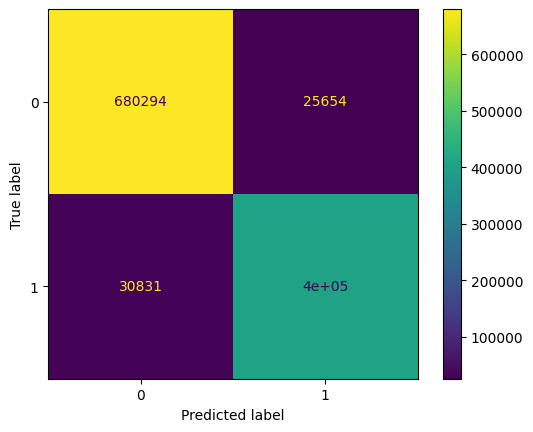

In [22]:
# Modelo LGBM Optimizado v2

modelo_lgbm_cv_ohp = LGBMClassifier(
    random_state=42,
)

param_grid_lgbm_cv_ohp = {
    'n_estimators': [3000, 4000],
    'max_depth': [25],
    'learning_rate': [0.35],
    'num_leaves': [50, 75],
}

grid_search_lgbm_cv_ohp = GridSearchCV(
    estimator=modelo_lgbm_cv_ohp,
    param_grid=param_grid_lgbm_cv_ohp,
    cv=kf,
    scoring="accuracy",
    n_jobs=-1,
    verbose=3,
    )

grid_search_lgbm_cv_ohp.fit(X_mix_train, y_mix_train)
print(f"Best HyperParameters: {grid_search_lgbm_cv_ohp.best_params_}")

# Asignar mejor estimador al modelo
modelo_lgbm_cv_ohp = grid_search_lgbm_cv_ohp.best_estimator_

# Resultados sobre test
y_mix_pred_test_lgbm_cv_ohp = modelo_lgbm_cv_ohp.predict(X_mix_test)
accuracy_test = accuracy_score(y_mix_test, y_mix_pred_test_lgbm_cv_ohp)
print("Accuracy Test     :", accuracy_test)

# Resultados sobre dataset completo
y_mix_pred_lgbm_cv_ohp = modelo_lgbm_cv_ohp.predict(X_mix)
accuracy_completo = accuracy_score(y_mix, y_mix_pred_lgbm_cv_ohp)
print("Accuracy Completo :", accuracy_completo)

# Distribución de calcelaciones, realidad vs predicciones
print(np.unique(y_mix, return_counts=True))
print(np.unique(y_mix_pred_lgbm_cv_ohp, return_counts=True))

# Matriz de confusión
cm = confusion_matrix(y_mix, y_mix_pred_lgbm_cv_ohp, labels=np.unique(y_mix))
print(f'successes = {np.trace(cm)}')
ConfusionMatrixDisplay.from_predictions(y_mix, y_mix_pred_lgbm_cv_ohp, labels=np.unique(y_mix))

In [23]:
# Extraer todos los árboles
trees = modelo_lgbm_cv_ohp.booster_.dump_model()['tree_info']

# Calcular profundidad y hojas de cada árbol
depths = []
leaves = []
for tree in trees:
    depth, num_leaves = get_tree_stats(tree['tree_structure'])
    depths.append(depth)
    leaves.append(num_leaves)

# Reporte
print(f"Número total de árboles             : {len(trees)}")
print(f"Profundidad máxima real alcanzada   : {max(depths)}")
print(f"Profundidad promedio de los árboles : {sum(depths) / len(depths):.2f}")
print(f"Máximo número de hojas en un árbol  : {max(leaves)}")
print(f"Promedio de hojas por árbol         : {sum(leaves) / len(leaves):.2f}")

Número total de árboles             : 3000
Profundidad máxima real alcanzada   : 23
Profundidad promedio de los árboles : 12.79
Máximo número de hojas en un árbol  : 75
Promedio de hojas por árbol         : 75.00


#### Estudio de Resultados

In [24]:
df_resultados_test_1 = pd.concat(
    [
        X_mix_test,
        y_mix_test.rename("CANCELADA"),
        pd.Series(y_mix_pred_test_lgbm_cv_ohp, index=X_mix_test.index, name="CANCELADA_PRED")
    ],
    axis=1
)

In [25]:
df_resultados_test_1.head(15)

,HOTEL,LLEGADA_MES,LLEGADA_DIAm,LLEGADA_DIAs,LLEGADA_AVANCE,SALIDA_MES,SALIDA_DIAm,SALIDA_DIAs,SALIDA_AVANCE,NOCHES,DURACION_ESTANCIA,REGIMEN,TIPO,USO,PAX_NUM,PAX_CAT,ADULTOS,NENES,BEBES,TIPO_CLIENTE,CLIENTE,GRUPO,MONEDA,SUPLETORIA,CUNAS,FECHA_TOMA_MES,FECHA_TOMA_DIAm,FECHA_TOMA_DIAs,FECHA_TOMA_AVANCE,LT_TOMA_LLEGADA,FIDELIDAD,COMERCIALIZADORA,VALOR_USD,VALOR_USD_PAX,VALOR_USD_NOCHE,VALOR_USD_PAX_NOCHE,GRATIS,PAIS,CONTINENTE,SEGMENTO,FUENTE_NEGOCIO,CANCELADA,CANCELADA_PRED
1021862,TRSCapCana,9,4,1,0.673973,9,9,6,0.687671,5,Corta,AllInclusive,CAPJuniorSuiteSWPS,2,2,Parejas,2,0,0,1,HOTELCOLLECT_EXPEDIA,0,USD,0,0,7,11,2,0.523288,55,Ninguna,0,1843.810000,921.905000,368.762000,184.381000,0,ESTADOSUNIDOS,AMERICA,BAR,E-COMMERCE,1,1
912172,ComplejoRivieraMaya,1,2,7,0.002740,1,5,3,0.010959,3,Corta,AllInclusive,COLDeluxeGardenView,2,3,Familias,3,0,0,1,COSTAMARTRAVELCRUISE&TOURSINC,0,USD,0,0,11,18,4,0.879452,45,Ninguna,1,1026.720000,342.240000,342.240000,114.080000,0,PERU,AMERICA,FixedRates,T.O./T.A.,0,0
391766,TRSCapCana,3,24,4,0.224658,3,25,5,0.227397,1,Corta,AllInclusive,CAPJuniorSuiteMV,2,2,Parejas,2,0,0,1,AGODACOMPANYPTELTD,0,USD,0,0,3,21,1,0.216438,3,Ninguna,0,259.920000,129.960000,259.920000,129.960000,0,SINPAIS,DESCONOCIDO,BAR,E-COMMERCE,1,0
564572,ComplejoPuntaCana,7,23,6,0.556164,7,28,4,0.569863,5,Corta,AllInclusive,TRSJuniorSuitePS,2,2,Parejas,2,0,0,1,ROIBACK(GLOBALOBIS.L.),0,USD,0,0,4,10,7,0.271233,104,PalladiumRewards,0,1651.250000,825.625000,330.250000,165.125000,0,FRANCIA,EUROPA,Loyalty,DIRECTSALES,0,0
761584,GrandPalladiumImbassaiResort&Spa,9,8,5,0.684932,9,12,2,0.695890,4,Corta,AllInclusive,SSAJuniorSuitePS,1,1,Single,1,0,0,1,ROIBACK(GLOBALOBIS.L.),0,BRL,0,0,12,12,1,0.945205,270,PalladiumRewards,0,750.995205,750.995205,187.748801,187.748801,0,BRASIL,AMERICA,Loyalty,DIRECTSALES,1,1
450456,TRSCapCana,4,9,7,0.268493,4,12,3,0.276712,3,Corta,AllInclusive,CAPJuniorSuiteSWPS,2,2,Parejas,2,0,0,1,HOTELCOLLECT_EXPEDIA,0,USD,0,0,3,28,2,0.235616,12,Ninguna,0,1305.690000,652.845000,435.230000,217.615000,0,ESTADOSUNIDOS,AMERICA,BAR,E-COMMERCE,0,0
809213,PalladiumVallarta,3,23,3,0.221918,4,6,3,0.260274,14,Larga,AllInclusive,PVRDeluxePOV,2,2,Parejas,2,0,0,1,AIRCANADAVACATIONS,0,USD,0,0,2,24,4,0.147945,27,Ninguna,1,2654.400000,1327.200000,189.600000,94.800000,0,CANADA,AMERICA,FixedRates,T.O./T.A.,0,0
793920,ComplejoRivieraMaya,2,17,5,0.128767,2,19,7,0.134247,2,Corta,AllInclusive,KANJuniorSuiteGV,2,2,Parejas,2,0,0,1,BODASNACIONALES(MX),1,MXN,0,0,3,10,4,0.186301,344,Ninguna,0,758.957961,379.478980,379.478980,189.739490,0,MEXICO,AMERICA,Weddings,DIRECTSALES,1,1
933884,ComplejoCostaMujeres,4,13,3,0.279452,4,19,2,0.295890,6,Corta,AllInclusive,TRSLoftSuiteJT,2,2,Parejas,2,0,0,1,ExpediaLodgingPartnerServicesSarl,0,USD,0,0,3,20,7,0.213699,24,Ninguna,0,4014.130000,2007.065000,669.021667,334.510833,0,ESTADOSUNIDOS,AMERICA,Package,E-COMMERCE,0,0
310783,GrandPalladiumJamaica&LadyHamiltonResort,10,20,5,0.800000,10,22,7,0.805479,2,Corta,AllInclusive,JAMJuniorSuiteGV,1,1,Single,1,0,0,1,SALESJAMAICA,1,USD,0,0,10,2,1,0.750685,18,Ninguna,0,471.000000,471.000000,235.500000,235.500000,0,JAMAICA,AMERICA,FixedRates,DIRECTSALES,0,0


In [26]:
df_resultados_test_1['ACIERTO'] = 0

In [27]:
df_resultados_test_1.loc[(df_resultados_test_1['CANCELADA'] == 1) & (df_resultados_test_1['CANCELADA_PRED'] == 1), 'ACIERTO'] = 1
df_resultados_test_1.loc[(df_resultados_test_1['CANCELADA'] == 0) & (df_resultados_test_1['CANCELADA_PRED'] == 0), 'ACIERTO'] = 1

In [28]:
df_resultados_test_1.head(15)

,HOTEL,LLEGADA_MES,LLEGADA_DIAm,LLEGADA_DIAs,LLEGADA_AVANCE,SALIDA_MES,SALIDA_DIAm,SALIDA_DIAs,SALIDA_AVANCE,NOCHES,DURACION_ESTANCIA,REGIMEN,TIPO,USO,PAX_NUM,PAX_CAT,ADULTOS,NENES,BEBES,TIPO_CLIENTE,CLIENTE,GRUPO,MONEDA,SUPLETORIA,CUNAS,FECHA_TOMA_MES,FECHA_TOMA_DIAm,FECHA_TOMA_DIAs,FECHA_TOMA_AVANCE,LT_TOMA_LLEGADA,FIDELIDAD,COMERCIALIZADORA,VALOR_USD,VALOR_USD_PAX,VALOR_USD_NOCHE,VALOR_USD_PAX_NOCHE,GRATIS,PAIS,CONTINENTE,SEGMENTO,FUENTE_NEGOCIO,CANCELADA,CANCELADA_PRED,ACIERTO
1021862,TRSCapCana,9,4,1,0.673973,9,9,6,0.687671,5,Corta,AllInclusive,CAPJuniorSuiteSWPS,2,2,Parejas,2,0,0,1,HOTELCOLLECT_EXPEDIA,0,USD,0,0,7,11,2,0.523288,55,Ninguna,0,1843.810000,921.905000,368.762000,184.381000,0,ESTADOSUNIDOS,AMERICA,BAR,E-COMMERCE,1,1,1
912172,ComplejoRivieraMaya,1,2,7,0.002740,1,5,3,0.010959,3,Corta,AllInclusive,COLDeluxeGardenView,2,3,Familias,3,0,0,1,COSTAMARTRAVELCRUISE&TOURSINC,0,USD,0,0,11,18,4,0.879452,45,Ninguna,1,1026.720000,342.240000,342.240000,114.080000,0,PERU,AMERICA,FixedRates,T.O./T.A.,0,0,1
391766,TRSCapCana,3,24,4,0.224658,3,25,5,0.227397,1,Corta,AllInclusive,CAPJuniorSuiteMV,2,2,Parejas,2,0,0,1,AGODACOMPANYPTELTD,0,USD,0,0,3,21,1,0.216438,3,Ninguna,0,259.920000,129.960000,259.920000,129.960000,0,SINPAIS,DESCONOCIDO,BAR,E-COMMERCE,1,0,0
564572,ComplejoPuntaCana,7,23,6,0.556164,7,28,4,0.569863,5,Corta,AllInclusive,TRSJuniorSuitePS,2,2,Parejas,2,0,0,1,ROIBACK(GLOBALOBIS.L.),0,USD,0,0,4,10,7,0.271233,104,PalladiumRewards,0,1651.250000,825.625000,330.250000,165.125000,0,FRANCIA,EUROPA,Loyalty,DIRECTSALES,0,0,1
761584,GrandPalladiumImbassaiResort&Spa,9,8,5,0.684932,9,12,2,0.695890,4,Corta,AllInclusive,SSAJuniorSuitePS,1,1,Single,1,0,0,1,ROIBACK(GLOBALOBIS.L.),0,BRL,0,0,12,12,1,0.945205,270,PalladiumRewards,0,750.995205,750.995205,187.748801,187.748801,0,BRASIL,AMERICA,Loyalty,DIRECTSALES,1,1,1
450456,TRSCapCana,4,9,7,0.268493,4,12,3,0.276712,3,Corta,AllInclusive,CAPJuniorSuiteSWPS,2,2,Parejas,2,0,0,1,HOTELCOLLECT_EXPEDIA,0,USD,0,0,3,28,2,0.235616,12,Ninguna,0,1305.690000,652.845000,435.230000,217.615000,0,ESTADOSUNIDOS,AMERICA,BAR,E-COMMERCE,0,0,1
809213,PalladiumVallarta,3,23,3,0.221918,4,6,3,0.260274,14,Larga,AllInclusive,PVRDeluxePOV,2,2,Parejas,2,0,0,1,AIRCANADAVACATIONS,0,USD,0,0,2,24,4,0.147945,27,Ninguna,1,2654.400000,1327.200000,189.600000,94.800000,0,CANADA,AMERICA,FixedRates,T.O./T.A.,0,0,1
793920,ComplejoRivieraMaya,2,17,5,0.128767,2,19,7,0.134247,2,Corta,AllInclusive,KANJuniorSuiteGV,2,2,Parejas,2,0,0,1,BODASNACIONALES(MX),1,MXN,0,0,3,10,4,0.186301,344,Ninguna,0,758.957961,379.478980,379.478980,189.739490,0,MEXICO,AMERICA,Weddings,DIRECTSALES,1,1,1
933884,ComplejoCostaMujeres,4,13,3,0.279452,4,19,2,0.295890,6,Corta,AllInclusive,TRSLoftSuiteJT,2,2,Parejas,2,0,0,1,ExpediaLodgingPartnerServicesSarl,0,USD,0,0,3,20,7,0.213699,24,Ninguna,0,4014.130000,2007.065000,669.021667,334.510833,0,ESTADOSUNIDOS,AMERICA,Package,E-COMMERCE,0,0,1
310783,GrandPalladiumJamaica&LadyHamiltonResort,10,20,5,0.800000,10,22,7,0.805479,2,Corta,AllInclusive,JAMJuniorSuiteGV,1,1,Single,1,0,0,1,SALESJAMAICA,1,USD,0,0,10,2,1,0.750685,18,Ninguna,0,471.000000,471.000000,235.500000,235.500000,0,JAMAICA,AMERICA,FixedRates,DIRECTSALES,0,0,1


In [29]:
df_resultados_test_1['ACIERTO'].sum()/len(df_resultados_test_1)

np.float64(0.8141210754066129)

In [30]:
#df_resultados_completo_1 = df0.copy()
#df_resultados_completo_1['CANCELADA_PRED'] = 

In [35]:
df_resultados_completo_1 = pd.concat(
    [
        df0,
        pd.Series(y_mix_pred_lgbm_cv_ohp, index=df0.index, name="CANCELADA_PRED")
    ],
    axis=1
)

In [36]:
df_resultados_completo_1['ACIERTO'] = 0
df_resultados_completo_1.loc[(df_resultados_completo_1['CANCELADA'] == 1) & (df_resultados_completo_1['CANCELADA_PRED'] == 1), 'ACIERTO'] = 1
df_resultados_completo_1.loc[(df_resultados_completo_1['CANCELADA'] == 0) & (df_resultados_completo_1['CANCELADA_PRED'] == 0), 'ACIERTO'] = 1

In [37]:
df_resultados_completo_1.head(15)

,ID_RESERVA,ID_HOTEL,HOTEL,LLEGADA,LLEGADA_ANO,LLEGADA_MES,LLEGADA_DIAm,LLEGADA_DIAs,LLEGADA_AVANCE,SALIDA,SALIDA_ANO,SALIDA_MES,SALIDA_DIAm,SALIDA_DIAs,SALIDA_AVANCE,NOCHES,DURACION_ESTANCIA,REGIMEN,ID_TIPO,TIPO,USO,PAX_NUM,PAX_CAT,ADULTOS,NENES,BEBES,ID_CLIENTE,TIPO_CLIENTE,CLIENTE,GRUPO,ID_MONEDA,MONEDA,STATUS,MOTIVO,CHECKIN,SUPLETORIA,CUNAS,FECHA_TOMA,FECHA_TOMA_ANO,FECHA_TOMA_MES,FECHA_TOMA_DIAm,FECHA_TOMA_DIAs,FECHA_TOMA_AVANCE,FECHA_MOD,FECHA_MOD_ANO,FECHA_MOD_MES,FECHA_MOD_DIAm,FECHA_MOD_DIAs,FECHA_MOD_AVANCE,FECHA_CANCELACION,FECHA_CANCELACION_ANO,FECHA_CANCELACION_MES,FECHA_CANCELACION_DIAm,FECHA_CANCELACION_DIAs,FECHA_CANCELACION_AVANCE,LT_TOMA_LLEGADA,LT_TOMA_CANCELACION,ID_FIDELIDAD,FIDELIDAD,VALHAB,VALPEN,VALSERV,VALFIJOS,COMERCIALIZADORA,CMVALHAB,CMVALPEN,CMCVALSERV,VALOR_USD,VALOR_USD_PAX,VALOR_USD_NOCHE,VALOR_USD_PAX_NOCHE,AUTORIZO,GRATIS,PAIS,CONTINENTE,SEGMENTO,FUENTE_NEGOCIO,CANCELADA,CANCELADA_PRED,ACIERTO
0,456094009201,92,GrandPalladiumJamaica&LadyHamiltonResort,2022-12-28,2022,12,28,3,0.989041095890411,2023-01-04,2023,1,4,3,0.00821917808219178,7,Media,AllInclusive,23300,LHAmbassadorSuiteBSOV,2,3,Familias,2,1,0,19686200,1,PALLADIUMTRAVELCLUB_SOCIOS,0,700,USD,1,DESCONOCIDO_0,1,0,0,2022-01-13,2022,1,13,4,0.03287671232876712,2022-12-28,2022,12.0,28.0,3.0,0.989041095890411,NaN,NaT,NaN,NaN,NaN,NaN,349,NaN,0,Ninguna,1868.0,708.0,0.0,0.0,0,1868.0,708.0,0.0,2576.0,858.6666666666666,368.0,122.66666666666666,1,0,ESTADOSUNIDOS,AMERICA,Fixedrates,DIRECTSALES,0,0,1
1,425835909201,92,GrandPalladiumJamaica&LadyHamiltonResort,2022-01-22,2022,1,22,6,0.057534246575342465,2022-01-29,2022,1,29,6,0.07671232876712329,7,Media,AllInclusive,43800,LHJuniorSuiteGV,2,3,Familias,2,1,0,19686200,1,PALLADIUMTRAVELCLUB_SOCIOS,0,700,USD,3,DESCONOCIDO_0,0,0,0,2021-07-13,2021,7,13,2,0.5287671232876713,2022-01-20,2022,1.0,20.0,4.0,0.052054794520547946,2022-01-20,2022,1.0,20.0,4.0,0.052054794520547946,193,191.0,0,Ninguna,1329.3,665.0,0.0,0.0,0,1329.3,665.0,0.0,1994.3,664.7666666666667,284.9,94.96666666666667,1,0,ESTADOSUNIDOS,AMERICA,Fixedrates,DIRECTSALES,1,1,1
2,549929510601,106,ComplejoRivieraMaya,2023-11-06,2023,11,6,1,0.8465753424657534,2023-11-14,2023,11,14,2,0.8684931506849315,8,Media,AllInclusive,42000,TRSJuniorSuitePS,2,2,Parejas,2,0,0,19686200,1,PALLADIUMTRAVELCLUB_SOCIOS,0,700,USD,3,DESCONOCIDO_0,0,0,0,2023-04-17,2023,4,17,1,0.29041095890410956,2023-11-07,2023,11.0,7.0,2.0,0.8493150684931506,2023-10-17,2023,10.0,17.0,2.0,0.7917808219178082,203,183.0,0,Ninguna,1146.56,1146.56,0.0,12.48,0,1146.56,1146.56,0.0,2305.6,1152.8,288.2,144.1,1,0,CANADA,AMERICA,Fixedrates,DIRECTSALES,1,0,0
3,519229110601,106,ComplejoRivieraMaya,2023-11-06,2023,11,6,1,0.8465753424657534,2023-11-23,2023,11,23,4,0.8931506849315068,17,Larga,AllInclusive,42000,TRSJuniorSuitePS,2,2,Parejas,2,0,0,19686200,1,PALLADIUMTRAVELCLUB_SOCIOS,0,700,USD,3,DESCONOCIDO_0,0,0,0,2023-02-22,2023,2,22,3,0.14246575342465753,2023-11-07,2023,11.0,7.0,2.0,0.8493150684931506,2023-09-14,2023,9.0,14.0,4.0,0.7013698630136986,257,204.0,0,Ninguna,2436.44,2436.44,0.0,26.52,0,2436.44,2436.44,0.0,4899.400000000001,2449.7000000000003,288.20000000000005,144.10000000000002,1,0,ESTADOSUNIDOS,AMERICA,Fixedrates,DIRECTSALES,1,1,1
4,537405910601,106,ComplejoRivieraMaya,2023-11-25,2023,11,25,6,0.8986301369863013,2023-12-09,2023,12,9,6,0.936986301369863,14,Larga,AllInclusive,13000,COLJuniorSuiteGV,1,1,Single,1,0,0,19686200,1,PALLADIUMTRAVELCLUB_SOCIOS,0,700,USD,3,DESCONOCIDO_0,0,0,0,2023-02-17,2023,2,17,5,0.12876712328767123,2023-11-26,2023,11.0,26.0,7.0,0.9013698630136986,2023-04-11,2023,4.0,11.0,2.0,0.273972602739726,281,53.0,0,Ninguna,2413.18,0.0,0.0,21.84,0,2413.18,0.0,0.0,2435.02,2435.02,173.93,173.93,1,0,RUMANIA,EURESTE,Fixedrates,DIRECTSALES,1,1,1
5,568452209201,92,GrandPalladiumJamaica&LadyHamiltonResort,2023-11-02,2023,11,2,4,0.8356164383561644,2023-11-09,2023,11,9,4,0.8547945205479452,7,Media,AllInclusive,43000,JAMSuiteOFV,2,2,Parejas,2,0,0,24258205,1,PTC(DE)_SEMANABENEFICIO,0,700,USD,3,DESCO

In [38]:
df_resultados_completo_1['ACIERTO'].sum()/len(df_resultados_completo_1)

np.float64(0.9504208326421127)

In [ ]:
#df_resultados_test_1.to_csv('df_resultados_test_1.csv', index=False, encoding='utf-8')
#df_resultados_completo_1.to_csv('df_resultados_completo_1.csv', index=False, encoding='utf-8')